# Aula 11 - Explicações em Sistemas de Recomendação - Exercícios

## Importação dos dados (MovieLens 100k)

In [28]:
# !pip install "numpy<2.0" # para funcionar com o case recommender

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np

In [9]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2025-10-20 20:09:10--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.2’

ml-100k.zip.2       100%[===================>]   4.70M  14.5MB/s    in 0.3s    

2025-10-20 20:09:10 (14.5 MB/s) - ‘ml-100k.zip.2’ saved [4924029/4924029]



In [11]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [2]:
#Types of genres
genre = pd.read_csv('./ml-100k/u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [3]:
#Types of occupations
occupation = pd.read_csv('./ml-100k/u.occupation', sep="|", encoding='latin-1', header=None)
occupation.columns = ['Occupations']
occupation_list = list(occupation['Occupations'])
occupation_list

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [24]:
#Load the Ratings data
data = pd.read_csv('./ml-100k/u.data', sep="\t", header=None)
data.columns = ['userId', 'movieId', 'rating', 'timestamp']
data.head(25)

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [74]:
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None,
                   names=['movieId', 'title' ,'release','video release date', 'IMDb URL'] + genre_list)

item['release'] = pd.to_datetime(item['release'])
item = item[pd.notnull(item['release'])]
item['year'] = item['release'].dt.year.astype(int)

item.drop(columns=['release', 'video release date', 'IMDb URL'], inplace=True)

item.head()

,movieId,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [6]:
df_meta = item.melt(id_vars=['movieId', 'title'], var_name='genre')
df_meta = df_meta[df_meta.value == 1]
df_meta.drop(columns=['value'], inplace=True)
df_meta.head()

,movieId,title,genre
1371,1373,Good Morning (1971),unknown
1682,2,GoldenEye (1995),Action
1684,4,Get Shorty (1995),Action
1697,17,From Dusk Till Dawn (1996),Action
1701,21,Muppet Treasure Island (1996),Action


In [7]:
#Load the User data
user = pd.read_csv('./ml-100k/u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['userId', 'age', 'gender', 'occupation', 'zip code']
user.head()

,userId,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Abordagens intrínsecas ao modelo

In [10]:
!pip install caserecommender -q

In [11]:
import matplotlib.pyplot as plt
from caserec.recommenders.item_recommendation.itemknn import ItemKNN
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN
from caserec.recommenders.item_recommendation.bprmf import BprMF
import warnings

In [12]:
warnings.filterwarnings("ignore")

In [91]:
try:
    item_titles = item.set_index('movieId')['title']
except NameError as e:
    print(f"Erro1: {e}")

try:
    item_attributes_df = item[['movieId'] + genre_list]
    item_attributes_df.to_csv('./ml-100k/item_attributes.dat', sep='\t', index=False, header=False)
except Exception as e:
    print(f"Erro2: {e}")

***Exercício 01:*** Utilize o algoritmo UserKNN ou ItemKNN (pode ser do CaseRecommender) para gerar recomendações para um usuário aleatório da base. Forneça uma explicação para uma das recomendações geradas. Dica: sua explicação pode ser na forma de um gráfico, veja o slide 13 "explicações baseadas em usuários ou itens relaventes".

In [76]:
print(dir(recommender_itemknn))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'as_binary', 'as_similar_first', 'compute', 'compute_similarity', 'create_matrix', 'evaluate', 'evaluation_results', 'extra_info_header', 'init_model', 'item_id_to_item', 'item_to_item_id', 'items', 'k_neighbors', 'matrix', 'output_file', 'output_sep', 'predict', 'predict_scores', 'predict_similar_first_scores', 'rank_length', 'ranking', 'read_files', 'recommender_name', 'sep', 'si_matrix', 'similar_items', 'similarity_metric', 'test_file', 'test_set', 'train_file', 'train_set', 'user_id_to_user', 'user_to_user_id', 'users', 'write_ranking']


In [92]:
# Modelo ItemKNN
recommender_itemknn = ItemKNN('./ml-100k/u1.base', './ml-100k/u1.test')
recommender_itemknn.compute()

[Case Recommender: Item Recommendation > ItemKNN Algorithm]

train data:: 943 users and 1650 items (80000 interactions) | sparsity:: 94.86%
test data:: 459 users and 1410 items (20000 interactions) | sparsity:: 96.91%

training_time:: 3.484812 sec
prediction_time:: 38.282142 sec


Eval:: PREC@1: 0.56427 PREC@3: 0.557734 PREC@5: 0.515904 PREC@10: 0.457081 RECALL@1: 0.02187 RECALL@3: 0.067151 RECALL@5: 0.100582 RECALL@10: 0.164318 MAP@1: 0.56427 MAP@3: 0.671932 MAP@5: 0.665726 MAP@10: 0.627036 NDCG@1: 0.56427 NDCG@3: 0.758062 NDCG@5: 0.753554 NDCG@10: 0.733023 


In [93]:
train_df = pd.read_csv('./ml-100k/u1.base', sep='\t', header=None, names=['user', 'movieId', 'feedback', 'timestamp'])

user_activity = train_df.groupby('user')['movieId'].count().sort_values(ascending=False)
print(user_activity.head(1))

# pega o primeiro user para os testes e garantir que teremos base para a similaridade
train_users = user_activity.iloc[:1].index.tolist()
user_id_1 = train_users[0]

user
655    685
Name: movieId, dtype: int64



Recomendação (ItemKNN) para User 655: 'Princess Bride, The (1987)' (Score: 20.7359)
** Estamos recomendando este filme porque você gostou de 'Empire Strikes Back, The (1980)', que é um filme muito similar (de acordo com o ItemKNN).

Gráfico de similaridade com itens que você já gostou:


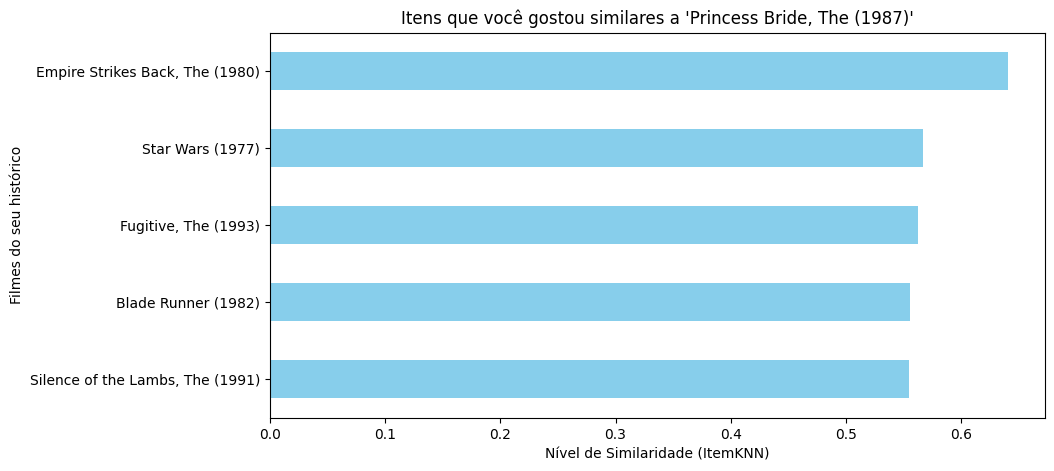

In [94]:
try:

    # Gerar predições para o usuário
    # Filtra o ranking do user
    user_ranking_1 = [
        (item, score)
        for (user, item, score) in recommender_itemknn.ranking
        if user == user_id_1
    ][:5]

    if user_ranking_1:

        # Pegar a recomendação principal
        rec_item_id_1, rec_score_1 = user_ranking_1[0]
        rec_title_1 = item_titles.get(rec_item_id_1, "Título Desconhecido")

        print(f"\nRecomendação (ItemKNN) para User {user_id_1}: '{rec_title_1}' (Score: {rec_score_1:.4f})")

        # Gerar a Explicação: "Recomendamos X porque você gostou de Y, que são similares"

        try:
            data
        except NameError as e:
            print(f"Erro3: {e}")

        # Encontrar itens que o user gostou (rating >= 4)
        # Acessar o df de treino que o cs usou
        train_df = pd.read_csv('./ml-100k/u1.base', sep='\t', header=None, names=['user', 'movieId', 'feedback', 'timestamp'])
        user_history_df_1 = train_df[(train_df['user'] == user_id_1) & (train_df['feedback'] >= 4)]
        user_liked_items_1 = user_history_df_1['movieId'].tolist()

        # Encontrar o item mais similar à recomendação que o usuário já gostou
        similarities_1 = {}
        if hasattr(recommender_itemknn, 'si_matrix'):
          sim_matrix = recommender_itemknn.si_matrix
          item_to_index = recommender_itemknn.item_to_item_id
          index_to_item = recommender_itemknn.item_id_to_item

          if rec_item_id_1 in item_to_index:
              rec_idx = item_to_index[rec_item_id_1]

              for liked_item_id in user_liked_items_1:
                  if liked_item_id in item_to_index:
                      liked_idx = item_to_index[liked_item_id]
                      sim = sim_matrix[rec_idx, liked_idx]
                      similarities_1[item_titles.get(liked_item_id, str(liked_item_id))] = sim


        # Apresentar a a msg e o gráfico
        sim_series_1 = pd.Series(similarities_1).sort_values(ascending=False)

        if not sim_series_1.empty:

            most_similar_title_1 = sim_series_1.index[0]

            print(f"** Estamos recomendando este filme porque você gostou de '{most_similar_title_1}', que é um filme muito similar (de acordo com o ItemKNN).")

            # Plotar gráfico
            print("\nGráfico de similaridade com itens que você já gostou:")
            plt.figure(figsize=(10, 5))
            sim_series_1.head(5).plot(kind='barh', color='skyblue')
            plt.title(f"Itens que você gostou similares a '{rec_title_1}'")
            plt.xlabel("Nível de Similaridade (ItemKNN)")
            plt.ylabel("Filmes do seu histórico")
            plt.gca().invert_yaxis() # Item mais similar no topo
            plt.show()

        else:
            print(f"** Não foi possível gerar uma explicação baseada em similaridade para '{rec_title_1}' (nenhum item similar encontrado no histórico).")
    else:
        print(f"Não há recomendações (ItemKNN) para o usuário {user_id_1}.")

except Exception as e:
    print(f"Erro4: {e}")

***Exercício 02:*** Forneça uma explicação de uma recomendação para um usuário com base no algoritmo ItemAttributeKNN. Utilize o template: "Estou te recomendando X pois este filme possui os mesmos gêneros A, B e C que o filme Y que você já assistiu e gostou".
- X, Y : título de um filme
- A, B, C : gênero

In [ ]:
import pandas as pd
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN

# Definir os caminhos
train_file = './ml-100k/u1.base'
test_file = './ml-100k/u1.test'
metadata_filepath = './ml-100k/item_attributes.dat'

# Modelo Item Atribute KNN
recommender_itemattknn = ItemAttributeKNN(
    train_file=train_file,
    test_file=test_file,
    metadata_file=metadata_filepath,
    sep='\t'
)

recommender_itemattknn.compute()

In [97]:
# Geradno a explicação
try:
    # Mesmo user  do Exercício 01
    user_id_2 = user_id_1

    # Filtra o ranking para o usuário
    user_ranking_2 = [
        (item, score)
        for (user, item, score) in recommender_itemattknn.ranking
        if user == user_id_2
    ][:5]

    if user_ranking_2:
        # Pegar a recomendação principal
        rec_item_id_2, rec_score_2 = user_ranking_2[0]
        rec_title_2 = item_titles.get(rec_item_id_2, "Título Desconhecido")

        # Encontrar o item mais similar (em atributos)
        similarities_2 = {}
        if hasattr(recommender_itemattknn, 'si_matrix'):
            sim_matrix_2 = recommender_itemattknn.si_matrix
            item_to_index_2 = recommender_itemattknn.item_to_item_id

            if rec_item_id_2 in item_to_index_2:
                rec_idx_2 = item_to_index_2[rec_item_id_2]

                for liked_item_id in user_liked_items_1:
                    if liked_item_id in item_to_index_2:
                        liked_idx_2 = item_to_index_2[liked_item_id]
                        sim_2 = sim_matrix_2[rec_idx_2, liked_idx_2]
                        similarities_2[liked_item_id] = sim_2

        # Se encontrou similaridades
        if similarities_2:
            sim_series_2 = pd.Series(similarities_2).sort_values(ascending=False)

            # Pegar o item mais similar do histórico para usar (Filme Y)
            most_similar_liked_id_2 = sim_series_2.index[0]
            most_similar_liked_title_2 = item_titles.get(most_similar_liked_id_2, "Filme Y")

            # Pegar os gêneros de X (Recomendado) e Y (Histórico)
            item_genres_df = item.set_index('movieId')[genre_list]

            rec_genres = item_genres_df.loc[rec_item_id_2]
            rec_genre_list = rec_genres[rec_genres == 1].index.tolist()

            liked_genres = item_genres_df.loc[most_similar_liked_id_2]
            liked_genre_list = liked_genres[liked_genres == 1].index.tolist()

            # Encontrar gêneros em comum (A, B, C)
            common_genres = list(set(rec_genre_list) & set(liked_genre_list))

            # Montar a explicação
            if common_genres:
                genres_str = ", ".join(common_genres[:3]) # Limita a 3 para a explicação
                print(f"** Estamos te recomendando '{rec_title_2}' pois este filme possui os mesmos gêneros ({genres_str}) que o filme '{most_similar_liked_title_2}' que você já assistiu e gostou.")
            else:
                print(f"** Estamos te recomendando '{rec_title_2}'. Ele é similar a '{most_similar_liked_title_2}' que você gostou, embora não compartilhem gêneros (segundo o dataset).")
        else:
            print(f"** Não foi possível gerar uma similaridade de atributos para '{rec_title_2}'.")

    else:
        print(f"Não há recomendações (ItemAttributeKNN) para o usuário {user_id_2}.")

except Exception as e:
    print(f"Erro4: {e}")

** Estamos te recomendando 'From Dusk Till Dawn (1996)' pois este filme possui os mesmos gêneros (Action, Crime) que o filme 'Godfather: Part II, The (1974)' que você já assistiu e gostou.


## Abordagem agnóstica ao modelo

***Exercício 03:*** Pense e implemente uma estratégia de explicação agnóstica ao modelo: utilize o BPRMF para calcular recomencações, e depois implemente outra estratégia para explicar uma das recomendações para um usuário.

In [99]:
from caserec.recommenders.item_recommendation.bprmf import BprMF

# Modelo BPRMF
recommender_bprmf = BprMF('./ml-100k/u1.base', './ml-100k/u1.test')
recommender_bprmf.compute()

[Case Recommender: Item Recommendation > BPRMF]

train data:: 943 users and 1650 items (80000 interactions) | sparsity:: 94.86%
test data:: 459 users and 1410 items (20000 interactions) | sparsity:: 96.91%

training_time:: 106.445878 sec
prediction_time:: 1.202256 sec


Eval:: PREC@1: 0.555556 PREC@3: 0.498911 PREC@5: 0.467102 PREC@10: 0.433333 RECALL@1: 0.024327 RECALL@3: 0.061373 RECALL@5: 0.093603 RECALL@10: 0.160107 MAP@1: 0.555556 MAP@3: 0.631627 MAP@5: 0.627536 MAP@10: 0.592369 NDCG@1: 0.555556 NDCG@3: 0.700912 NDCG@5: 0.707657 NDCG@10: 0.700532 


In [98]:

try:
    user_id_3 = user_id_1

    # Filtrar ranking
    user_ranking_3 = [
        (item, score)
        for (user, item, score) in recommender_bprmf.ranking
        if user == user_id_3
    ][:5]

    if user_ranking_3:
        # Pegar a recomendação principal (X)
        rec_item_id_3, rec_score_3 = user_ranking_3[0]
        rec_title_3 = item_titles.get(rec_item_id_3, "Título Desconhecido")

        print(f"\nRecomendação (BPRMF) para User {user_id_3}: '{rec_title_3}'")

        item_genres_df = item.set_index('movieId')[genre_list]

        # Pegar os gêneros do item recomendado (X)
        rec_genres_3 = item_genres_df.loc[rec_item_id_3]
        rec_genre_list_3 = rec_genres_3[rec_genres_3 == 1].index.tolist()

        if not rec_genre_list_3:
            print("** Explicação: Recomendamos este filme para você.") # Fallback
        else:
            genres_str_3 = ", ".join(rec_genre_list_3)
            print(f"** Estamos recomendando este filme porque ele é dos gêneros: [{genres_str_3}].")

            # Itens (Y, Z) que o user gostou que também são desses gêneros

            # Gêneros de todos os itens que o user gostou
            liked_items_genres_df = item_genres_df.loc[user_liked_items_1]

            # Achar quais filmes do histórico têm algum desses gêneros
            relevant_history_ids = []
            for g in rec_genre_list_3:
                # Filtra o dataframe de filmes gostados para achar quais têm o gênero 'g'
                movies_with_genre_g = liked_items_genres_df[liked_items_genres_df[g] == 1].index.tolist()
                relevant_history_ids.extend(movies_with_genre_g)

            # Pegar os títulos únicos
            if relevant_history_ids:
                explaining_titles = item_titles.loc[list(set(relevant_history_ids))[:3]].tolist()
                titles_str = ", ".join(explaining_titles)
                print(f"** Vimos que você também gostou de outros filmes desses gêneros, como: {titles_str}.")
            else:
                 print(f"** Vimos que você gosta de experimentar coisas novas, e este filme é de um gênero que você ainda não avaliou bem.")

    else:
        print(f"Não há recomendações (BPRMF) para o usuário {user_id_3}.")

except Exception as e:
    print(f"Erro5: {e}")

Computando BPRMF...
[Case Recommender: Item Recommendation > BPRMF]

train data:: 943 users and 1650 items (80000 interactions) | sparsity:: 94.86%
test data:: 459 users and 1410 items (20000 interactions) | sparsity:: 96.91%

training_time:: 112.298979 sec
prediction_time:: 1.435486 sec


Eval:: PREC@1: 0.511983 PREC@3: 0.482208 PREC@5: 0.462745 PREC@10: 0.412636 RECALL@1: 0.018991 RECALL@3: 0.056725 RECALL@5: 0.088926 RECALL@10: 0.1534 MAP@1: 0.511983 MAP@3: 0.620552 MAP@5: 0.621218 MAP@10: 0.580923 NDCG@1: 0.511983 NDCG@3: 0.711273 NDCG@5: 0.712484 NDCG@10: 0.696187 
Modelo computado.

Recomendação (BPRMF) para User 655: 'Smilla's Sense of Snow (1997)'
** Estamos recomendando este filme porque ele é dos gêneros: [Action, Drama, Thriller].
** Vimos que você também gostou de outros filmes desses gêneros, como: Boot, Das (1981), Manhattan (1979), Shanghai Triad (Yao a yao yao dao waipo qiao) (1995).
